In [11]:
#!pip install stop-words
#!pip install wordcloud
#!pip install Pillow
#!pip install quandl
#!pip install plotly
!pip install psutil

In [12]:
%matplotlib inline
#Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
#target search
target_elon = ("@elonmusk")

#counter
counter = 1

#variable for holding sentiments
sentiments = []

#Loop through all tweets
for target in target_elon:
   
    #Variable for oldest tweet
    oldest_tweet = None
    
    #Loop through 5 pages from home feed (total 100 tweets)
    for x in range (10):
        
        #Get all tweets from home feed
        public_tweets = api.user_timeline(target_elon, max_id = oldest_tweet)
        
        #loop through all tweets
        for tweet in public_tweets:
            
            #Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results ["compound"]
            pos = results ["pos"]
            neg = results ["neg"]
            neu = results ["neu"]
            
            #Get oldest tweet id, subtract 1, and assign to oldest tweet
            oldest_tweet = tweet["id"] - 1
            
            #Add sentiments for each tweet into a list
            sentiments.append({"Source":target_elon,
                              "Text":tweet["text"],
                              "Date":tweet["created_at"],
                              "Compound":compound,
                              "Positive":pos,
                              "Neutral":neu,
                              "Negative":neg,
                              "Retweeted?":tweet["retweeted"],
                              "Retweet Count":tweet["retweet_count"],
                              "Favorite Count": tweet["favorite_count"]})
            counter +=1
tweets_df = pd.DataFrame.from_dict(sentiments)
tweets_df.head()
        

,Compound,Date,Favorite Count,Negative,Neutral,Positive,Retweet Count,Retweeted?,Source,Text
0,0.0000,Sat Nov 03 07:37:40 +0000 2018,14754,0.000,1.000,0.000,742,False,@elonmusk,So underappreciated
1,0.2960,Sat Nov 03 07:36:00 +0000 2018,1071,0.000,0.476,0.524,13,False,@elonmusk,@nichegamer @candiceruizy Ok
2,0.2960,Sat Nov 03 07:32:34 +0000 2018,1046,0.000,0.312,0.688,26,False,@elonmusk,@MacTechGenius Ok
3,-0.4404,Sat Nov 03 07:31:10 +0000 2018,31952,0.198,0.707,0.095,2046,False,@elonmusk,Walked full length of Boring Co tunnel under L...
4,0.6239,Sat Nov 03 07:20:48 +0000 2018,862,0.000,0.733,0.267,57,False,@elonmusk,@planet4589 Sounds like pure luxury! When I sa...


In [14]:
#Remove retweets and change the order of columns
tweets_df = tweets_df[tweets_df["Retweeted?"]==False][["Source","Text","Date","Compound","Positive","Neutral","Negative","Retweet Count","Favorite Count"]]
tweets_df.head()

,Source,Text,Date,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count
0,@elonmusk,So underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.0000,0.000,1.000,0.000,742,14754
1,@elonmusk,@nichegamer @candiceruizy Ok,Sat Nov 03 07:36:00 +0000 2018,0.2960,0.524,0.476,0.000,13,1071
2,@elonmusk,@MacTechGenius Ok,Sat Nov 03 07:32:34 +0000 2018,0.2960,0.688,0.312,0.000,26,1046
3,@elonmusk,Walked full length of Boring Co tunnel under L...,Sat Nov 03 07:31:10 +0000 2018,-0.4404,0.095,0.707,0.198,2046,31952
4,@elonmusk,@planet4589 Sounds like pure luxury! When I sa...,Sat Nov 03 07:20:48 +0000 2018,0.6239,0.267,0.733,0.000,57,862


In [30]:
from datetime import datetime, timezone
import pytz

formatted_date = []

for x in range(0, len(tweets_df)):
    formatted_date.append(datetime.strptime(tweets_df['Date'][x], '%a %b %d %H:%M:%S %z %Y').replace(tzinfo=timezone.utc).astimezone(pytz.timezone('US/Eastern')).strftime(
'%Y-%m-%d'))

tweets_df['formatted_date'] = formatted_date
tweets_df.head()

,Source,Text,Date,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count,formatted_date,Tweets,Hashtag,Accounts,positive,negative,positive_count,negative_count,score,sentiment
0,@elonmusk,underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.0000,0.000,1.000,0.000,742,14754,2018-11-03,So underappreciated,[],[],,,0,0,0,neutral
1,@elonmusk,ok,Sat Nov 03 07:36:00 +0000 2018,0.2960,0.524,0.476,0.000,13,1071,2018-11-03,@nichegamer @candiceruizy Ok,[],"[@nichegamer, @candiceruizy]",ok,,1,0,1,positive
2,@elonmusk,ok,Sat Nov 03 07:32:34 +0000 2018,0.2960,0.688,0.312,0.000,26,1046,2018-11-03,@MacTechGenius Ok,[],[@MacTechGenius],ok,,1,0,1,positive
3,@elonmusk,walked full length boring co tunnel la tonight...,Sat Nov 03 07:31:10 +0000 2018,-0.4404,0.095,0.707,0.198,2046,31952,2018-11-03,Walked full length of Boring Co tunnel under L...,[],[],full length disturbingly track opening dec one...,boring long dimensional,8,3,5,positive
4,@elonmusk,sounds like pure luxury said sponge actually s...,Sat Nov 03 07:20:48 +0000 2018,0.6239,0.267,0.733,0.000,57,862,2018-11-03,@planet4589 Sounds like pure luxury! When I sa...,[],[@planet4589],like pure luxury sponge actually speaking meta...,,8,0,8,positive


In [16]:
#convert to date format and extract hour
#from datetime import datetime, time, pytz
#from datetime_z import parse_datetime
#date_format = "%Y-%m-%dT%H:%M:%S"
#date_format = "%a%b%m%X%z%Y"
#tweets_df["Date"]= pd.to_datetime(tweets_df["Date"],format = date_format)
#tweets_df["Hour"]= pd.DateTimeIndex(tweets_df[Date]).hour


In [17]:
#create new tweets column
tweets_df["Tweets"]= tweets_df["Text"]

#Text Manipulation
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

#function to remove special characters, punctuations, stop words, digits, hyperlinks, etc.
def string_manipulation(df,column):
    #extract hastags
    df["Hashtag"] = df[column].str.findall(r'#.*?(?=\s|$)')
    #extract twitter account references
    df["Accounts"] = df[column].str.findall(r'@.*?(?=\s|$)')
    
    #remove hashtags and accounts from tweets
    df[column] = df[column].str.replace(r'#.*?(?=\s|$)'," ")
    df[column] = df[column].str.replace(r'@.*?(?=\s|$)'," ")
    
    #convert to lower case
    df[column] = df[column].str.lower()
    #remove hyperlinks
    df[column] = df[column].apply(lambda x:re.split('https:\/\/.*',str(x))[0])
    #remove punctuations
    df[column] = df[column].str.replace('[^\w\s]'," ")
    #remove special characters
    df[column] = df[column].str.replace("\W"," ")
    #remove digits
    df[column] = df[column].str.replace("\d+"," ")
    #remove under scores
    df[column] = df[column].str.replace("-"," ")
    #remove stopwords
    df[column] = df[column].apply(lambda x: " ".join([i for i in x.split()
                                                     if i not in (stop_words)]))
    return df

tweets_df = string_manipulation(tweets_df,"Text")
tweets_df.head()

,Source,Text,Date,Compound,Positive,Neutral,Negative,Retweet Count,Favorite Count,formatted_date,Tweets,Hashtag,Accounts
0,@elonmusk,underappreciated,Sat Nov 03 07:37:40 +0000 2018,0.0000,0.000,1.000,0.000,742,14754,2018-11-03 03:37:40,So underappreciated,[],[]
1,@elonmusk,ok,Sat Nov 03 07:36:00 +0000 2018,0.2960,0.524,0.476,0.000,13,1071,2018-11-03 03:36:00,@nichegamer @candiceruizy Ok,[],"[@nichegamer, @candiceruizy]"
2,@elonmusk,ok,Sat Nov 03 07:32:34 +0000 2018,0.2960,0.688,0.312,0.000,26,1046,2018-11-03 03:32:34,@MacTechGenius Ok,[],[@MacTechGenius]
3,@elonmusk,walked full length boring co tunnel la tonight...,Sat Nov 03 07:31:10 +0000 2018,-0.4404,0.095,0.707,0.198,2046,31952,2018-11-03 03:31:10,Walked full length of Boring Co tunnel under L...,[],[]
4,@elonmusk,sounds like pure luxury said sponge actually s...,Sat Nov 03 07:20:48 +0000 2018,0.6239,0.267,0.733,0.000,57,862,2018-11-03 03:20:48,@planet4589 Sounds like pure luxury! When I sa...,[],[@planet4589]


In [18]:
from PIL import Image
from os import path
twitter_mask = np.array(Image.open("images/twitter.png"))
twitter_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
def transform_format(val):
    if val ==0:
        return 255
    else:
        return val

In [20]:
transformed_twitter = np.ndarray((twitter_mask.shape[0],twitter_mask.shape[1]),np.int32)
for i in range(len(twitter_mask)):
    transformed_twitter[i]=list(map(transform_format,twitter_mask[i]))

In [21]:
transformed_twitter

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

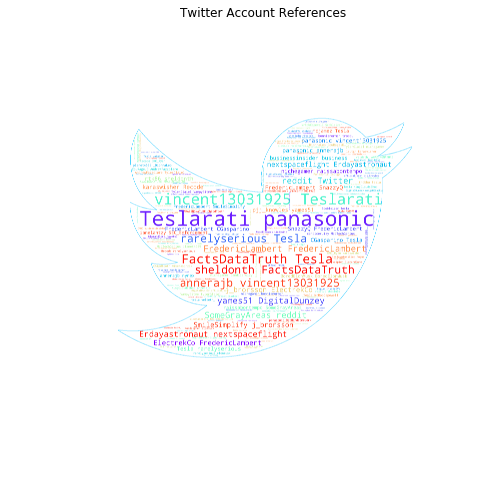

In [22]:
from wordcloud import WordCloud, ImageColorGenerator


acc_wrds = tweets_df["Tweets"].str.extractall(r'(\@\w+)')[0]
def build_word_cloud(words,back_color,palette,title):
    word_cloud = WordCloud(scale = 7, max_words=1000, max_font_size = 100,background_color = "white", random_state = 0, colormap = palette, mask=transformed_twitter,contour_width=10,contour_color="deepskyblue").generate(" ".join(words))
    plt.figure(figsize = (13,8))
    plt.imshow(word_cloud, interpolation = "bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    
build_word_cloud(acc_wrds,"black","rainbow","Twitter Account References")

In [23]:
positive_words = pd.read_csv("positive.txt",header=None)
negative_words = pd.read_csv("negative.txt", header=None, encoding='latin-1')

#convert words to lists
def convert_words_list(df):
    words = string_manipulation(df,0)
    words_list = words[words[0] != ""][0].tolist()
    return words_list

positive_words_list = convert_words_list(positive_words)
negative_words_list = convert_words_list(negative_words)

print("Positive Words: ")
print(positive_words_list[:20])
print("Negative Words: ")
print(negative_words_list[:20])

Positive Words: 
['suggestive', 'staple', 'shy', 'overhead', 'momentary', 'piety', 'spur', 'beaver', 'reinforcement', 'toss', 'devour', 'evaluation', 'knockout', 'ajar', 'ingest', 'brazen', 'squishy', 'dry', 'composite', 'customary']
Negative Words: 
['murder', 'leukemia', 'rapist', 'torture', 'torture', 'wreck', 'abuse', 'mourning', 'gonorrhea', 'abuse', 'rape', 'herpes', 'unsanitary', 'murder', 'wreck', 'rape', 'molester', 'disease', 'lynching', 'motherfucker']


In [24]:
#Scoring tweets based on positive and negative words count
def scoring_tweets(data_frame,text_column):
    data_frame["positive"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split() 
                                                                              if i in (positive_words_list)]))
    data_frame["negative"] = data_frame[text_column].apply(lambda x:" ".join([i for i in x.split()
                                                                              if i in (negative_words_list)]))
    #scoring
    data_frame["positive_count"] = data_frame["positive"].str.split().str.len()
    data_frame["negative_count"] = data_frame["negative"].str.split().str.len()
    data_frame["score"]    = data_frame["positive_count"] - data_frame["negative_count"]
    
    #create new feature sentiment :
    #+ve if score is +ve , #-ve if score is -ve , # neutral if score is 0
    def labeling(data_frame) :
        if data_frame["score"]   > 0  :
            return "positive"
        elif data_frame["score"] < 0  :
            return "negative"
        elif data_frame["score"] == 0 :
            return "neutral"
    data_frame["sentiment"] = data_frame.apply(lambda data_frame:labeling(data_frame),
                                               axis = 1)
        
    return data_frame

#print(scoring_tweets)
tweets_df  =  scoring_tweets(tweets_df,"Text")
tweets_df[["Text","positive","negative","positive_count",
              "negative_count","score","sentiment"]]

,Text,positive,negative,positive_count,negative_count,score,sentiment
0,underappreciated,,,0,0,0,neutral
1,ok,ok,,1,0,1,positive
2,ok,ok,,1,0,1,positive
3,walked full length boring co tunnel la tonight...,full length disturbingly track opening dec one...,boring long dimensional,8,3,5,positive
4,sounds like pure luxury said sponge actually s...,like pure luxury sponge actually speaking meta...,,8,0,8,positive
5,love,love,,1,0,1,positive
6,bikini bottom,bottom,bottom,1,1,0,neutral
7,fair,fair,,1,0,1,positive
8,yes,yes,,1,0,1,positive
9,even kids back little sponges,even back little,even back,3,2,1,positive


In [25]:
scr_dist = tweets_df["score"].value_counts().reset_index().sort_values(by = "index",
                                                                          ascending = True)
trace = go.Bar(x = scr_dist[scr_dist["index"] < 0]["index"],
               y = scr_dist[scr_dist["index"] < 0]["score"],
               marker = dict(line = dict(width = 1,color = "black"),
                             color = "red"),name = "Negative"
              )
trace1 = go.Bar(x = scr_dist[scr_dist["index"] > 0]["index"],
                y = scr_dist[scr_dist["index"] > 0]["score"],
                marker = dict(line = dict(width = 1,color = "black"),
                              color = "green"),name = "Positive"
              )
trace2 = go.Bar(x = scr_dist[scr_dist["index"] == 0]["index"],
                y = scr_dist[scr_dist["index"] == 0]["score"],
                marker = dict(line = dict(width = 1,color = "black"),
                              color = "blue"),name = "Zero"
              )
layout = go.Layout(dict(title = "Scores distribution",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     gridwidth = 2),
                        )
                  )
fig = go.Figure(data = [trace,trace1,trace2],layout = layout)
py.iplot(fig)
#plt.savefig('images\scores_dist')

<Figure size 432x288 with 0 Axes>

In [26]:
#import quandl
#apikey= "zskyLKm-iUFzeiivWVKG"

In [27]:
#quandl.ApiConfig.api_key = apikey
#mydata = quandl.get("WIKI/TSLA",start_date="2018-10-01",end_date="2018-11-01",qopts={"columns":['ticker','Close']},paginate=True)

#mydata =  quandl.get_table('WIKI/PRICES', qopts = { 'columns': ['ticker', 'date', 'close'] }, ticker = ['MSFT'], date = { 'gte': '2018-10-01', 'lte': '2018-11-01' })

#print(mydata)

Empty DataFrame
Columns: [ticker, date, close]
Index: []


In [28]:
#mydata.head()

,ticker,date,close
None,,,
